In [205]:
# Mai Xuan Bach
# HW Week 1

In [206]:
from itertools import groupby

In [207]:
import numpy as np

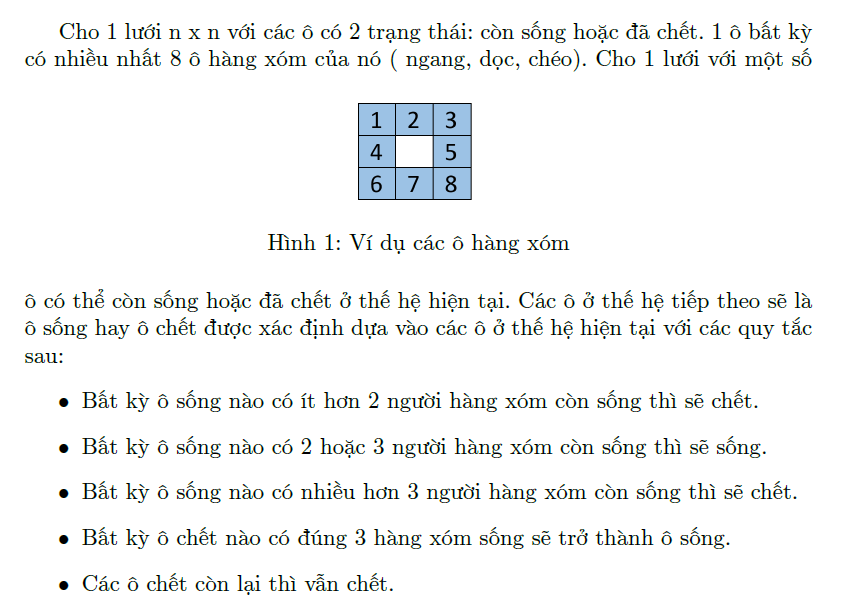

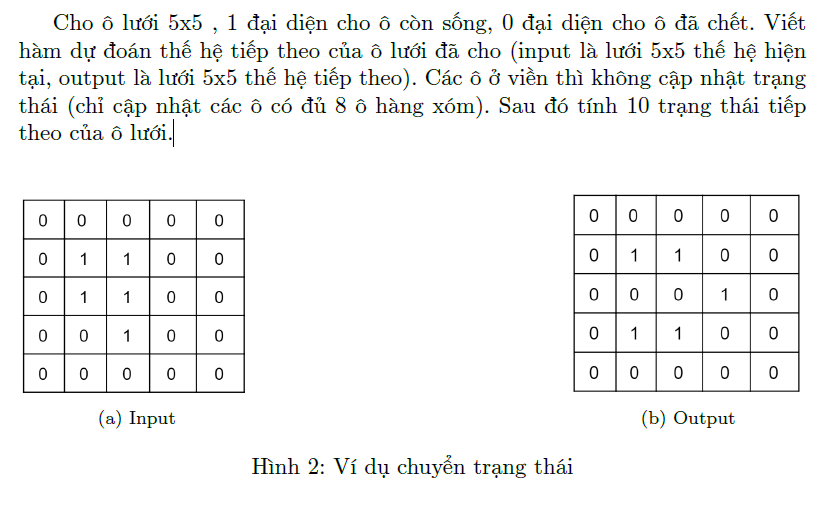

In [208]:
 array = [['0', '0', '0', '0', '0'],
        ['0', '1', '1', '0', '0'],
        ['0', '1', '1', '0', '0'],
        ['0', '0', '1', '0', '0'],
        ['0', '0', '0', '0', '0']]

In [209]:
def find_neighbors(arr):
    neighbors = []
    
    for i in range(len(arr)):
        for j, val in enumerate(arr[i]):
            
            # Xử lý các ô nằm đường viền
            if i == 0 or i == len(arr) - 1 or j == 0 or j == len(arr[i]) - 1:
                # Các ô nằm ở đường viền ngoại trừ viền trên (dòng đầu tiên) thì không lấy neighbor
                if i != 0 or i != len(arr) - 1 or j != 0 or j != len(arr[i]) - 1:
                    continue 
                    
            else:
                new_neighbors = [arr[i-1][j-1], 
                                 arr[i-1][j], 
                                 arr[i-1][j+1], 
                                 arr[i][j+1],  
                                 arr[i+1][j+1],
                                 arr[i+1][j],
                                 arr[i+1][j-1],
                                 arr[i][j-1]
                                ]
                # từ trên xuống dưới, từ trái qua phải (Tây Bắc -> Bắc -> Đông Bắc -> .... -> Tây)
            neighbors.append({val : [new_neighbors, [len(list(group)) for key, group in groupby(sorted(new_neighbors))]]})
    
    return neighbors

In [210]:
find_neighbors(array)

[{'1': [['0', '0', '0', '1', '1', '1', '0', '0'], [5, 3]]},
 {'1': [['0', '0', '0', '0', '0', '1', '1', '1'], [5, 3]]},
 {'0': [['0', '0', '0', '0', '0', '0', '1', '1'], [6, 2]]},
 {'1': [['0', '1', '1', '1', '1', '0', '0', '0'], [4, 4]]},
 {'1': [['1', '1', '0', '0', '0', '1', '0', '1'], [4, 4]]},
 {'0': [['1', '0', '0', '0', '0', '0', '1', '1'], [5, 3]]},
 {'0': [['0', '1', '1', '1', '0', '0', '0', '0'], [5, 3]]},
 {'1': [['1', '1', '0', '0', '0', '0', '0', '0'], [6, 2]]},
 {'0': [['1', '0', '0', '0', '0', '0', '0', '1'], [6, 2]]}]

In [211]:
def predict_new_gen(arr):
    neighbor_lst_dct = find_neighbors(arr)  # a list of dictionaries
    result_arr = np.copy(arr)

    count = -1
    for i in range(len(arr)):
        for j, val in enumerate(arr[i]):

            # Xử lý các ô nằm đường viền
            if i == 0 or i == len(arr) - 1 or j == 0 or j == len(arr[i]) - 1:
                # Các ô nằm ở đường viền ngoại trừ viền trên (dòng đầu tiên) thì không cập nhật trạng thái
                if i != 0 or i != len(arr) - 1 or j != 0 or j != len(arr[i]) - 1:
                    continue

            else:
                count += 1
                dic = neighbor_lst_dct[count]
                key = list(dic.keys())[0]
                if key == "1":
                    if dic[key][1][0] > 6 or dic[key][1][0] < 5:
                        result_arr[i][j] = "0"
                    else:
                        result_arr[i][j] = "1"
                elif key == "0":
                    if dic[key][1][0] == 5:
                        result_arr[i][j] = "1"
                    else:
                        result_arr[i][j] = "0"
    return result_arr

In [212]:
F = []
f1 = predict_new_gen(array)
print("f1: ", f1)
F.append(f1)

for i in range(10):
    new_gen = predict_new_gen(F[i])
    print("f{}: ".format(i+2), new_gen)
    F.append(new_gen)

f1:  [['0' '0' '0' '0' '0']
 ['0' '1' '1' '0' '0']
 ['0' '0' '0' '1' '0']
 ['0' '1' '1' '0' '0']
 ['0' '0' '0' '0' '0']]
f2:  [['0' '0' '0' '0' '0']
 ['0' '0' '1' '0' '0']
 ['0' '0' '0' '1' '0']
 ['0' '0' '1' '0' '0']
 ['0' '0' '0' '0' '0']]
f3:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '1' '1' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f4:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f5:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f6:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f7:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f8:  [['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0']]
f9:  [['0' '0' '0' '0' '0']
 ['0